# Permutation City #
Creating the cover of Greg Egan's novel using Python and P5. This sketch is built using a web based Python Notebook using [Basthon](https://notebook.basthon.fr/)

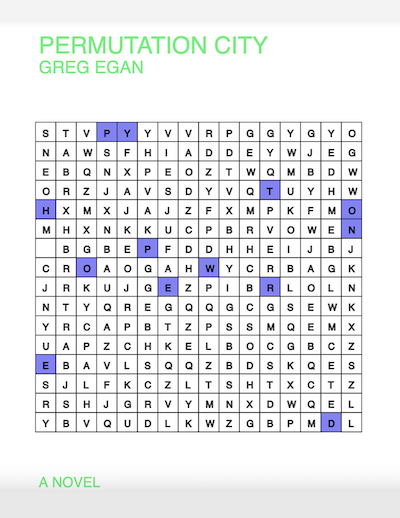

This notebook is based on *Permutation City*, a fascinating novel set in the near future where human consciousness can be copied into a computer (known as a "copy") – with some awesome and terrifying possibilities. I wanted to explore creating the book’s cover using Python and Processing.

Part of the story concerns itself with a kind of steganography where the "copy’s" running code (aka a person in a virtual world) needs to be hidden into an existing area of active memory. I think that the designer of the cover was playing with this idea by embedding the title of the book into a grid of random text. The letters are highlighted, allowing you to read the message, otherwise it would be nearly impossible to see it.

This notebook generats the cover running Python and P5 in web browser. The above cover spells out “Python Powered” – rather than the book’s actual title. It is running the notebook using [Basthon](https://notebook.basthon.fr/)

In [96]:
# first some imports
from p5 import * # and like that we are using P5.js! 
from random import randint

We will build the cover up from small pieces. We can start by looking at a message and creating a random grid of letters. Then we will mix the message into the grid - then it will be ready to be drawn using Processing.

In [97]:
message = "this is my message".lower().replace(" ","")
# for now make message all lower case, later we will use this to highlight the message
print(message)

thisismymessage


In [75]:
# size of grid of letters
ROWS = 16
COLS = 16

In [76]:
def random_positions(n,rows,cols):
    "Return a list of n random positions in a grid of size rows by cols."
    l = []
    while len(l)<n:
        r,c = randint(0,rows-1),randint(0,cols-1)
        if (r,c) not in l:
            l.append((r,c))
    l.sort()
    return l

In [77]:
message_positions = random_positions(len(message), ROWS, COLS)
message_positions

[(0, 12), (1, 15), (3, 6), (7, 0), (8, 6), (9, 3), (9, 8), (11, 10), (12, 10), (12, 13), (12, 14), (13, 10), (14, 6), (14, 10), (15, 3)]

In [78]:
def randletter():
    return "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[randint(0,25)]

print(randletter())
print(randletter())

I
N


In [79]:
def build_grid():
    return [ [randletter() for c in range(COLS)] for r in range(ROWS)]
print(build_grid())

[['M', 'Y', 'I', 'X', 'W', 'R', 'S', 'K', 'T', 'H', 'V', 'P', 'T', 'C', 'O', 'J'], ['J', 'Q', 'O', 'U', 'B', 'M', 'P', 'Y', 'W', 'H', 'T', 'P', 'V', 'G', 'B', 'P'], ['M', 'P', 'M', 'N', 'D', 'D', 'N', 'Y', 'Y', 'K', 'N', 'W', 'S', 'H', 'F', 'M'], ['D', 'G', 'H', 'Q', 'S', 'D', 'Y', 'R', 'I', 'K', 'G', 'T', 'B', 'M', 'F', 'N'], ['E', 'X', 'A', 'K', 'B', 'S', 'G', 'F', 'F', 'L', 'M', 'X', 'F', 'D', 'K', 'I'], ['B', 'L', 'N', 'P', 'P', 'B', 'F', 'F', 'F', 'Y', 'A', 'Y', 'I', 'B', 'Y', 'Y'], ['I', 'I', 'O', 'Q', 'X', 'Z', 'B', 'P', 'E', 'F', 'W', 'P', 'Y', 'G', 'K', 'K'], ['E', 'E', 'I', 'K', 'F', 'B', 'K', 'O', 'H', 'V', 'Z', 'B', 'J', 'Y', 'I', 'E'], ['P', 'K', 'C', 'G', 'S', 'I', 'P', 'V', 'X', 'W', 'Y', 'X', 'P', 'Q', 'G', 'C'], ['T', 'G', 'V', 'H', 'C', 'L', 'F', 'N', 'Q', 'C', 'W', 'G', 'X', 'P', 'K', 'H'], ['R', 'M', 'H', 'Y', 'B', 'B', 'U', 'Z', 'C', 'C', 'B', 'Q', 'N', 'A', 'Z', 'Q'], ['N', 'M', 'Y', 'R', 'X', 'F', 'O', 'V', 'N', 'C', 'J', 'Y', 'Y', 'B', 'A', 'A'], ['J', 'R', 'R',

In [80]:
def fill_grid(message, message_positions, rows, cols):
    "return a 2D list of random letters of size cols x rows with the message mixed in"

    grid = build_grid()
    i = 0
    
    # loop through message replacing 1s with message and 0s with random letters
    for r in range(rows):
        for c in range(cols):
            if (r,c) in message_positions:
                grid[r][c]=message[i]
                i+=1
            else:
                grid[r][c] = randletter()
    
    return(grid)

Now we will have a 2D list with random letters and a message mixed in. The message is written in lowercase for now so you can see it.

In [81]:
letter_grid = fill_grid(message, message_positions, ROWS, COLS)
letter_grid

[['V', 'W', 'Z', 'G', 'C', 'W', 'A', 'S', 'U', 'U', 'A', 'U', 't', 'K', 'B', 'X'], ['F', 'S', 'H', 'G', 'Q', 'Q', 'L', 'T', 'S', 'O', 'D', 'M', 'F', 'U', 'D', 'h'], ['H', 'P', 'L', 'J', 'J', 'I', 'C', 'S', 'D', 'T', 'J', 'P', 'A', 'L', 'U', 'H'], ['Q', 'T', 'G', 'F', 'O', 'M', 'i', 'D', 'X', 'L', 'J', 'Y', 'K', 'Y', 'I', 'D'], ['I', 'Q', 'F', 'T', 'W', 'I', 'E', 'H', 'E', 'N', 'S', 'Z', 'H', 'V', 'Y', 'Y'], ['R', 'Q', 'O', 'U', 'U', 'G', 'V', 'B', 'K', 'O', 'W', 'T', 'K', 'Q', 'B', 'E'], ['Z', 'K', 'L', 'J', 'W', 'R', 'A', 'F', 'A', 'Z', 'X', 'J', 'L', 'Z', 'O', 'Z'], ['s', 'E', 'A', 'P', 'T', 'Q', 'X', 'J', 'I', 'S', 'J', 'V', 'B', 'W', 'G', 'F'], ['E', 'X', 'G', 'E', 'Z', 'K', 'i', 'D', 'O', 'W', 'F', 'G', 'U', 'C', 'J', 'E'], ['R', 'U', 'B', 's', 'T', 'G', 'R', 'D', 'm', 'V', 'L', 'G', 'T', 'Y', 'K', 'H'], ['W', 'Q', 'Z', 'C', 'R', 'X', 'G', 'G', 'Y', 'F', 'L', 'V', 'W', 'L', 'D', 'F'], ['T', 'F', 'F', 'T', 'V', 'X', 'M', 'H', 'D', 'Y', 'y', 'Y', 'B', 'Y', 'N', 'K'], ['I', 'F', 'M',

In [82]:
"i".islower()


True

Now the P5 code to draw the cover onto the canvas. For the grid we will loop through the data structure above. If the letter is lowercase it will highlighted and drawn using upper case.

In [98]:
def grid(letter_grid):
    
    fill(255)
    strokeWeight(1)
    # w was a global variable - ??? make a parameter
    cell_w = ((w/2)-40)/COLS
    cell_h = ((w/2)-40)/ROWS * 0.95
    
    #textFont(author_font,16)
    
    # grid
    x,y = 0,0
    for row in range(ROWS):
        x=0
        for col in range(COLS):
            letter = letter_grid[row][col]
            
            if letter.islower(): 
                # message letter
                fill(130,130,250)
                stroke(0)
                strokeWeight(0.8)
                rect(x,y,cell_w,cell_h)
                fill(0)
                text(letter.upper(), x+cell_w/2-4, y+cell_h/2+6)
            else: 
                # just a random letter
                fill(255) 
                stroke(0)
                strokeWeight(1)
                rect(x,y,cell_w,cell_h)    
                fill(70)  
                text(letter, x+cell_w/2-4, y+cell_h/2+6)
            
            x+=cell_w
        y+=cell_h

You can do a quick mini setup and draw here to see how things are looking.

In [84]:
def setup():
    createCanvas(200, 200)
def draw():
    scale(1)
    grid(letter_grid)
    noLoop()
run()

We should be ready to think about how to display this and the other elements of the book cover. Time to get started on the P5 side!

But first, I will say, this code was written first using the Python P5 implementation called [PyP5js](https://github.com/berinhard/pyp5js). When converting over to this notebook a few things stopped working. The form fields that P5 created are gone. They allowed you to change the message and update speed. You can still do this, without the forms controls, but by changing the variables. I can not get fonts working at this time either and I don't really know what the issue(s) are.

But, the main loop runs just fine and building Processing / P5 code in a notebook has been a really great way to (re)write some code. When I copied this into a notebook I did end up re-writing things to make it more based on functions. I enjoyed building in the notebook. It turns out introspection works quite well. And building code up in a notebook is really a great way to build up a animation.

On to the P5 code.

In [86]:
# font loading not working
title_font = None
def preload():
    title_font = loadFont("https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnPKreRhf6Xl7Glw.woff2")

In [99]:
def setup():
    global message # need to fix code below re: form / input
    
    # track when to update
    global update, update_freq
    update_freq = 100 # frames per update
    update = frameCount
    
    message = "python powered"
    # this is not working, have to look into this
    #createP()
    #createSpan("Hidden Message: ")
    #message = createInput()
    #message.attribute('value','Your Message Here')
    #message = "Your message here"
    
    #createP()
    #createSpan("Refresh Rate: ")
    #slider = createSlider(0.1,30,1)
    #slider.style('width','100px')
    slider = 10
    
    createCanvas(450, 675)

In [88]:
def draw():

    global update, title_font
    
    # update grid according to update_freq
    if  frameCount > (update+update_freq):
        update = frameCount
    
        push()
    
        background(160)
        fill(255)
        strokeWeight(0)
        
        # outline of book in a way, white area
        rect(0, 0, 973-523, 718-44)
        #(973, 718)

        # draw grid
        translate(25,150)
        message_positions = random_positions(len(message), ROWS, COLS)
        grid(fill_grid(message, message_positions, ROWS, COLS))

        # title
        strokeWeight(0)
        fill("#3AF072")
        translate(4,-87)
        
        #textFont(title_font)
        textSize(30)
        text("PERMUTATION CITY",0,0)

        textSize(22)
        #textFont(author_font,22)
        text("GREG EGAN",0,25)#30

        #textFont(author_font,18)
        textSize(18)
        text("A NOVEL",0,550)#30

        pop()

In [100]:
run()

In [90]:
message

'abcdef'

In [91]:
frameCount

0

In [92]:
update

0

In [93]:
update

0